Zie: Buijs, 13.4 Meervoudige regressie doorlezen (dit gaan we niet gebruiken). In het R-book het hoofdstuk voor multiple regressie pagina 489.

$ y = \alpha + \beta_1 x + \beta_2 z + \epsilon $

*Code voorbeeld van de ELO*:

```r
# 10.13.1 Multiple regression model
# data invoeren
X1<-matrix(c(4,3.75,3.25,3.75,3,3.5,2.75,3))
X2<-matrix(c(10,10,12,8,12,14,20,18))
Y<-matrix(c(18,20,24,17,22,21,25,23))
M<-cbind(X1,X2,Y)
# onderzoek de correlatie m.b.v. paarsgewijze grafieken
pairs(M,panel=panel.smooth)
summary(M)
# best fit
model<-lm(Y~X1+X2)
model
summary(model)
# plot the resultaten
par(mfrow=c(2,2))
plot(model)
# multicolineariteit: te sterke samenhang tussen onafhankelijke variabelen onderling
# regel 1: R<0.7
# regel 2: R(Xi~Xj)<R(Xj~Y) 
# m.a.w. de correlatie tussen onafhankelijke variabelen onderling mag niet sterker zijn dan de 
# correlatie van een van de onafhankelijke variabele met de afhankelijke variabele  
# correlatiematrix
corrmatrix<-cor(M)
round(corrmatrix,2)
vif<-1/(1-cor(M))
predictor<-sqrt(vif)
corrmatrix
vif
predictor

******************************************

# Determinantiecoefficient (by hand)

# data invoeren
X1<-matrix(c(4,3.75,3.25,3.75,3,3.5,2.75,3))
X2<-matrix(c(10,10,12,8,12,14,20,18))
Y<-matrix(c(18,20,24,17,22,21,25,23))
# plotten van de data

layout(matrix(c(1,2,3,4),2,2)) # optional 4 graphs/page
plot(fit)
# bepalen van betha coefficienten met de hand
M1<-cbind(1,X1,X2)
betha<-solve(t(M)%*%M)%*%t(M)%*%Y
# Q: controleer of de berekende coefficienten overeenkomen met het model
fit<-lm(Y~X1+X2)
summary(fit)
anova(fit)

# andere coefficienten
coefficients(fit) 		# model coefficients
confint(fit, level=0.95) 	# CIs for model parameters
fitted(fit) 			# predicted values
residuals(fit) 			# residuals
anova(fit) 			# anova table
vcov(fit) 			# covariance matrix for model parameters
influence(fit) 			# regression diagnostics 
```

       V1              V2           V3       
 Min.   :2.750   Min.   : 8   Min.   :17.00  
 1st Qu.:3.000   1st Qu.:10   1st Qu.:19.50  
 Median :3.375   Median :12   Median :21.50  
 Mean   :3.375   Mean   :13   Mean   :21.25  
 3rd Qu.:3.750   3rd Qu.:15   3rd Qu.:23.25  
 Max.   :4.000   Max.   :20   Max.   :25.00  

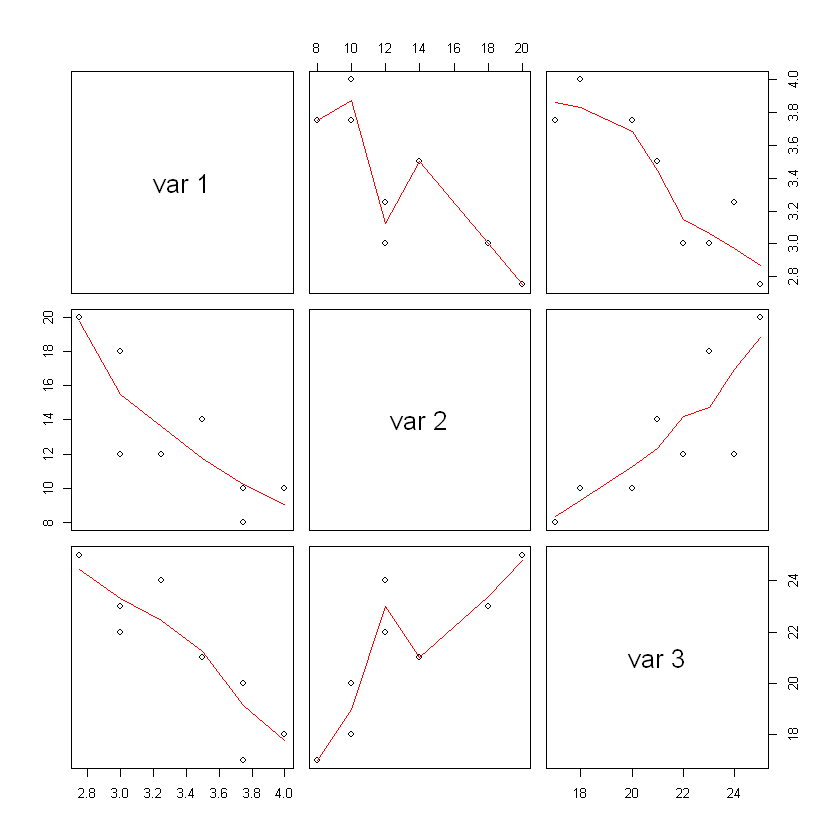

In [1]:
# 10.13.1 Multiple regression model
# data invoeren
X1<-matrix(c(4,3.75,3.25,3.75,3,3.5,2.75,3))
X2<-matrix(c(10,10,12,8,12,14,20,18))
Y<-matrix(c(18,20,24,17,22,21,25,23))
M<-cbind(X1,X2,Y)
# onderzoek de correlatie m.b.v. paarsgewijze grafieken
pairs(M,panel=panel.smooth)
summary(M)


Call:
lm(formula = Y ~ X1 + X2)

Coefficients:
(Intercept)           X1           X2  
    33.6336      -4.3288       0.1712  



Call:
lm(formula = Y ~ X1 + X2)

Residuals:
       1        2        3        4        5        6        7        8 
-0.03082  0.88699  2.38014 -1.77055 -0.70205  0.11986 -0.15411 -0.72945 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  33.6336     9.9164   3.392   0.0194 *
X1           -4.3288     2.1607  -2.003   0.1015  
X2            0.1712     0.2313   0.740   0.4924  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.459 on 5 degrees of freedom
Multiple R-squared:  0.8081,	Adjusted R-squared:  0.7313 
F-statistic: 10.53 on 2 and 5 DF,  p-value: 0.01613


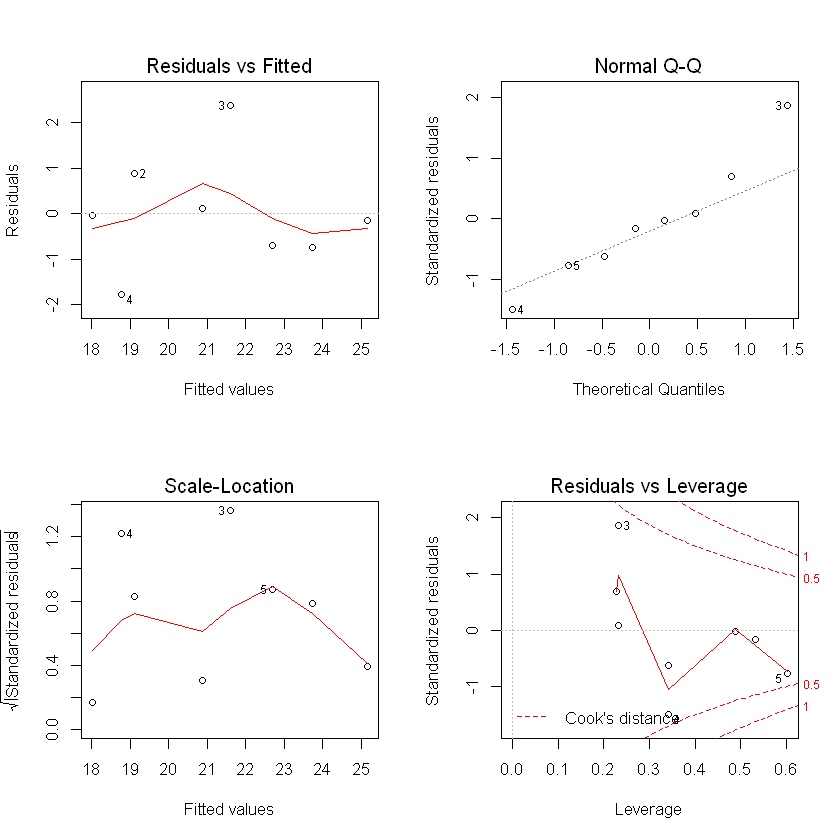

In [2]:
model<-lm(Y~X1+X2)
model
summary(model)
# plot the resultaten
par(mfrow=c(2,2))
plot(model)

Vanuit het het `lm` model kunnen we zien dat:

 * intercept is $33.63$
 * $x_1 = -3.32$
 * $x_2 = .17$
 
Verder hebben we de st. error, t-value en de probability. De st. error wordt weergeven per variabel. 

Bij een variabel $x$ die normaal verdeeld is $N(\mu, \sigma)$ kunnen we deze naar de standaardnormaalverdeling omzetten met de transformatie $z = \frac{x-\mu}{\sigma}$. Omdat $\sigma$ niet bekend, krijgen we de _t_-verdeling, namelijk: $\frac{x-\mu}{s\sqrt{n}}$.

De probability $P(r>|t|)$ geeft aan dat ...

**Multicolineariteit**: een te sterke samenhang tussen onafhaneklijke variabelen onderling. 

 1. $R < 0.7$
 2. $R(X_i \sim X_j) < R(X_j \sim Y)$

Met andere woorden, de correlatie tussen onafhankelijke variabelen onderling mag niet sterker zijn dan de correlatie van één van de onafhankelijke variabele met afhankelijke variabele.